In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
#load train data
train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')

In [4]:
train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [5]:
#load test data
test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [6]:
test.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [7]:
# Combine the train and test DataFrames into a single DataFrame
combine = pd.concat([train,test],ignore_index = True)

In [8]:
# Shuffle the combined DataFrame randomly
# `frac=1` indicates that 100% of the data should be sampled
# `reset_index(drop=True)` resets the index of the shuffled DataFrame and drops the old index
combine = combine.sample(frac=1).reset_index(drop=True)

In [9]:
# Save the combined DataFrame to a CSV file named "combine_dataset.csv"
combine.to_csv("combine_dataset.csv",index = False)

In [10]:

df = pd.read_csv("/kaggle/working/combine_dataset.csv")

In [11]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,418981,2020-12-01 13:20:03,30074693890476,fraud_Schmeler-Howe,personal_care,14.23,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,55e41f6f388ebe98fec3fc20e8bbe571,1385904003,38.316522,-100.109879,0
1,752186,2019-11-17 21:02:21,30364087349027,fraud_Bogisich-Weimann,kids_pets,22.03,Samuel,Sandoval,M,0005 Morrison Land,...,35.8896,-96.0887,7163,Fitness centre manager,1982-02-05,d844bbbc7775b5d1e4f16b47a7e4d4f1,1353186141,35.038005,-96.261922,0
2,1209725,2020-05-20 15:59:13,4373370572092720777,"fraud_Fadel, Mertz and Rippin",entertainment,7.93,Hailey,Rhodes,F,337 Michael Harbors Suite 722,...,48.0204,-98.1186,454,"Producer, television/film/video",1972-07-29,51923d109f3eabb12bc0d4fa14ed54e6,1369065553,48.368274,-98.026835,0
3,1235339,2020-05-30 21:48:44,3598304579370089,fraud_Adams-Barrows,health_fitness,58.86,Vincent,Flowers,M,0189 Emily Prairie,...,37.6395,-97.1714,409656,Heritage manager,1985-12-27,4c7a99a4531c88ccd3337607ba4dc0f1,1369950524,38.258251,-97.787631,0
4,24280,2020-06-29 14:48:52,4810839835482794272,fraud_Hilpert-Conroy,kids_pets,41.10,Carolyn,Perez,F,433 Blake Roads Suite 967,...,36.7651,-94.0492,760,Production manager,1985-08-31,215f791bf5d48de502bc6e42b2be74f9,1372517332,35.838953,-94.339787,0
5,877782,2019-12-21 22:12:45,348379466427142,fraud_Eichmann-Kilback,home,20.59,Michael,Rowe,M,7428 Martinez Flats,...,28.1384,-80.6524,139650,Database administrator,1957-01-23,c28b9b06810677f1ce4e6f6bb2ce679b,1356127965,28.168284,-81.201618,0
6,425332,2019-07-09 22:44:59,6517217825320610,fraud_Schoen Ltd,kids_pets,83.03,James,Reese,M,26975 Richardson Mills Apt. 402,...,31.6453,-90.1801,1196,"Librarian, academic",1958-06-11,6385615ddf546a1739fb4010248dd59c,1341873899,32.404675,-91.170781,0
7,1042482,2020-03-08 17:25:56,3547574373318979,"fraud_Streich, Rolfson and Wilderman",kids_pets,24.37,Jacob,Patel,M,54822 Hill Forks,...,39.0319,-88.4074,2092,"Psychologist, clinical",1962-04-30,a05bf4c4d9b7a2578c749d420661fd7a,1362763556,38.151059,-87.693286,0
8,669000,2019-10-12 15:31:47,377026671291680,fraud_Hyatt-Blick,travel,6.78,Jackie,Davis,F,1898 Parker Fork Apt. 057,...,37.3272,-91.0243,241,Investment analyst,1974-10-27,d6ef85545a7110bc0ef84dec2265aaa2,1350055907,37.847592,-91.880894,0
9,436058,2019-07-14 04:19:24,6011367958204270,fraud_Smitham-Boehm,grocery_net,71.15,Tammy,Ayers,F,1652 James Mews,...,41.2419,-81.7453,7646,Medical sales representative,1988-09-15,7b1339e585a7916cf67d4ebea3cd171c,1342239564,41.241914,-82.170849,0


In [12]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [13]:
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [14]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [15]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [17]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [18]:
df = pd.concat([train,test],axis=0)

In [19]:
df.shape

(1852394, 23)

In [20]:
# Returns a Series with the count of null (missing) values for each column
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

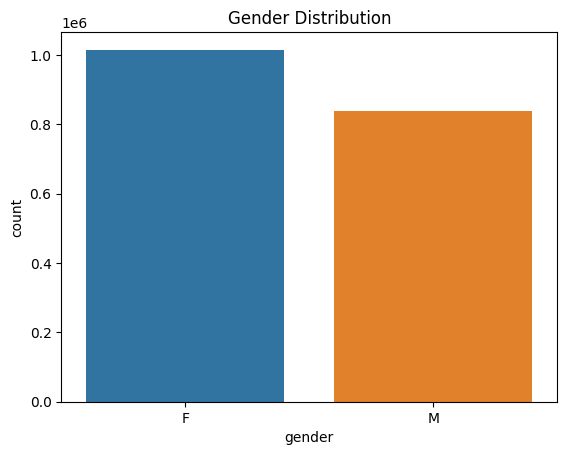

In [21]:
# Create count plot for gender distribution, set title, and display the plot
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()

In [22]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [23]:
# Select categorical columns (object type) from the DataFrame df
categorical_columns = df.select_dtypes(include=['object']).columns

In [24]:
categorical_columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [25]:
#Dropping Unnecessary columns.
df.drop(columns=['trans_date_trans_time','first','last','street','city','dob'],axis=1,inplace=True)

In [26]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [27]:
df.head(10)

,Unnamed: 0,cc_num,merchant,category,amt,gender,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,F,PA,18917,40.3750,-75.2045,2158,Transport planner,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,F,KS,67851,37.9931,-100.9893,2691,Arboriculturist,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,M,VA,22824,38.8432,-78.6003,6018,"Designer, multimedia",6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,F,PA,15665,40.3359,-79.6607,1472,Public affairs consultant,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,F,TN,37040,36.5220,-87.3490,151785,Pathologist,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [28]:
# Again Selecting categorical columns (object type) from the DataFrame df and store them in categorical_columns2
categorical_columns2 = df.select_dtypes(include=['object']).columns

In [29]:
categorical_columns2

Index(['merchant', 'category', 'gender', 'state', 'job', 'trans_num'], dtype='object')

In [30]:
#Dropping state and job columns
df.drop(columns=['state', 'job'],axis=1, inplace=True)

In [31]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [32]:
# Encode categorical columns using LabelEncoder
encoding = LabelEncoder()
df['merchant'] = encoding.fit_transform(df['merchant'])
df['category'] = encoding.fit_transform(df['category'])
df['gender'] = encoding.fit_transform(df['gender'])
df['trans_num'] = encoding.fit_transform(df['trans_num'])




In [33]:
df.dtypes

Unnamed: 0      int64
cc_num          int64
merchant        int64
category        int64
amt           float64
gender          int64
zip             int64
lat           float64
long          float64
city_pop        int64
trans_num       int64
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [34]:
# Compute the correlation matrix for numerical columns in the DataFrame df
corr_matrix = df.corr()

In [35]:
corr_matrix

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,trans_num,unix_time,merch_lat,merch_long,is_fraud
Unnamed: 0,1.000000,0.000063,-0.001043,-0.000130,0.000949,-0.000233,0.000370,0.000239,-0.000610,-0.000880,-0.000647,0.174527,0.000211,-0.000611,0.000524
cc_num,0.000063,1.000000,0.000437,0.000327,0.001826,0.000333,0.041504,-0.058744,-0.048429,-0.009118,0.000953,0.000284,-0.058415,-0.048421,-0.001125
merchant,-0.001043,0.000437,1.000000,0.031020,-0.002973,-0.001247,0.000692,-0.001450,-0.000348,0.001281,-0.000329,-0.000169,-0.001362,-0.000353,-0.000424
category,-0.000130,0.000327,0.031020,1.000000,0.029665,-0.028088,0.003013,-0.008526,-0.001406,0.009318,-0.000653,0.001043,-0.008417,-0.001404,0.019278
amt,0.000949,0.001826,-0.002973,0.029665,1.000000,0.000740,0.001979,-0.000670,-0.000735,0.004921,-0.001687,-0.002411,-0.000613,-0.000711,0.209308
gender,-0.000233,0.000333,-0.001247,-0.028088,0.000740,1.000000,-0.066106,0.042862,0.050653,-0.028862,-0.000337,-0.001387,0.042621,0.050606,0.005844
zip,0.000370,0.041504,0.000692,0.003013,0.001979,-0.066106,1.000000,-0.114554,-0.909795,0.077601,-0.000728,0.001017,-0.113934,-0.908981,-0.002190
lat,0.000239,-0.058744,-0.001450,-0.008526,-0.000670,0.042862,-0.114554,1.000000,-0.014744,-0.154816,-0.001183,0.000741,0.993582,-0.014709,0.002904
long,-0.000610,-0.048429,-0.000348,-0.001406,-0.000735,0.050653,-0.909795,-0.014744,1.000000,-0.052359,0.000851,-0.000574,-0.014585,0.999118,0.001022
city_pop,-0.000880,-0.009118,0.001281,0.009318,0.004921,-0.028862,0.077601,-0.154816,-0.052359,1.000000,0.000401,-0.001636,-0.153863,-0.052329,0.000325


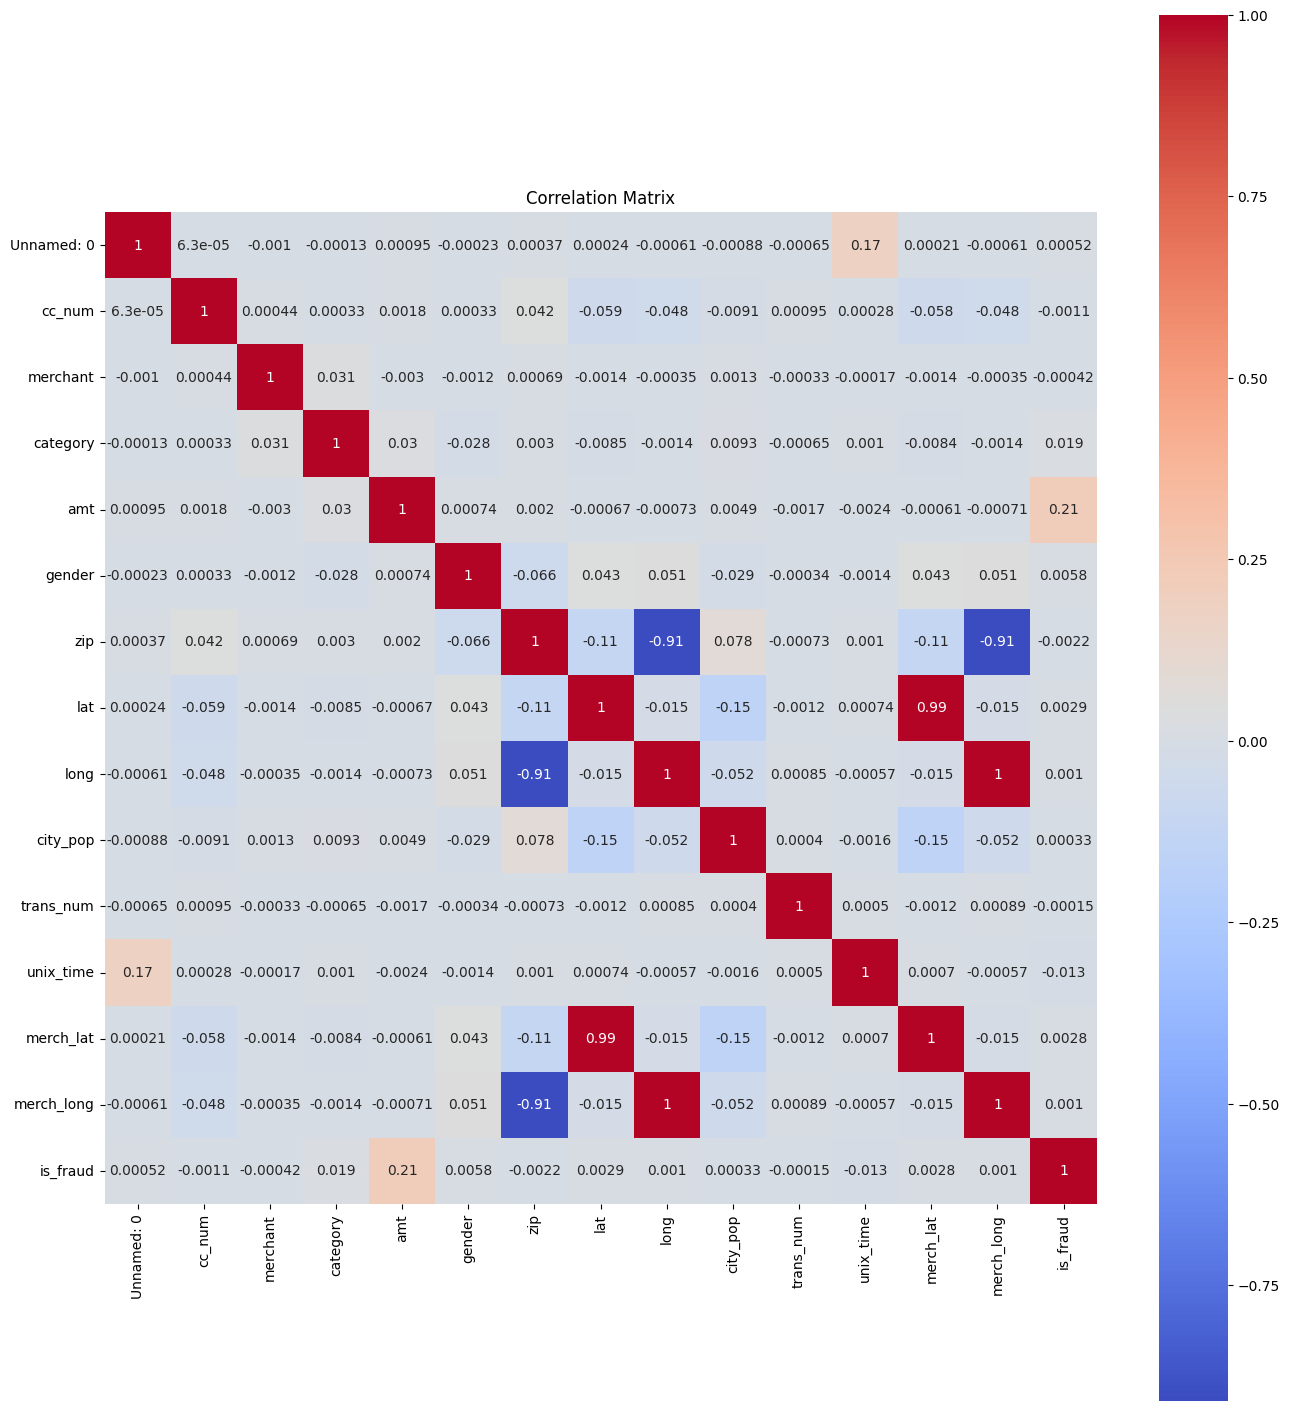

In [36]:
# Create a heatmap of the correlation matrix with annotations and a specified color map
plt.figure(figsize=(16,18))
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm',square=True)
plt.title("Correlation Matrix")
plt.show()

In [37]:
df.columns

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [38]:
df['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [39]:
# Identify columns with correlation less than 0.5 to 'is_fraud columns'
important_columns = corr_matrix[corr_matrix['is_fraud']<0.5].index
important_columns 

Index(['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'gender', 'zip',
       'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long'],
      dtype='object')

In [40]:
# Identify columns with correlation greater than 0.5 to 'is_fraud'
highcorr_columns = corr_matrix[corr_matrix['is_fraud']>0.5].index
highcorr_columns 

Index(['is_fraud'], dtype='object')

In [41]:
# Identify columns in df that need scaling based on their value range (o to 1)
columns_need_to_scale =[]
for columns in df.columns:
    if((df[columns]<0).any() or (df[columns]>1).any()):
        columns_need_to_scale.append(columns)
        

In [42]:
print(columns_need_to_scale)

['Unnamed: 0', 'cc_num', 'merchant', 'category', 'amt', 'zip', 'lat', 'long', 'city_pop', 'trans_num', 'unix_time', 'merch_lat', 'merch_long']


In [43]:
X = df.drop('is_fraud', axis =1)
y = df['is_fraud']

In [44]:
X.shape

(1852394, 14)

In [45]:
y.shape

(1852394,)

In [46]:
# Apply SMOTE to balance dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy="auto")

X_resampled, y_resampled = smote.fit_resample(X,y)
    

In [47]:
X = X_resampled
y = y_resampled

In [48]:
y.value_counts()

is_fraud
0    1842743
1    1842743
Name: count, dtype: int64

In [49]:
 #Split the dataset into training and testing sets with 20% for testing

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
X_train.shape

(2948388, 14)

In [51]:
# Standardize specified columns in X_train and X_test using StandardScaler

scaler = StandardScaler()

X_train[columns_need_to_scale] = scaler.fit_transform(X_train[columns_need_to_scale])
X_test[columns_need_to_scale] = scaler.fit_transform(X_test[columns_need_to_scale])


In [52]:
X_train.values

array([[-1.01644552, -0.31214831, -0.48947457, ...,  1.07065137,
        -0.85461564, -0.60444907],
       [-1.21128037, -0.31282937,  0.24802995, ...,  0.94842336,
        -0.4914474 ,  0.64212473],
       [-0.11303913, -0.31181868,  0.38111347, ..., -0.71359299,
        -1.6766395 , -0.42783479],
       ...,
       [-0.91044518, -0.31027035, -0.19003664, ...,  1.13916305,
         0.08464877,  0.94738647],
       [ 0.03992291, -0.31109943,  1.70640355, ..., -0.61544474,
        -2.46869929, -0.65771956],
       [-0.46406268, -0.31491679,  0.78590919, ...,  1.48719971,
         0.95276946,  0.96563048]])

In [63]:
# Initialize and fit a Logistic Regression model using the training data
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [64]:
# Predict training labels and calculate the training accuracy of the Logistic Regression model
train_predict = lr.predict(X_train)
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for LogisticRegression is", train_accuracy,"%")

Train accuracy for LogisticRegression is 88.4690888716139 %


In [65]:
# Predict test labels and calculate the test accuracy of the Logistic Regression model
test_predict = lr.predict(X_test)
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for LogisticRegression is", test_accuracy,"%")

Test accuracy for LogisticRegression is 88.48796225196651 %


In [66]:
# Initialize and fit a Decision Tree Classifier using the training data
dr = DecisionTreeClassifier()
dr.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
train_predict = dr.predict(X_train)
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for DecisionTreeClassifier is", train_accuracy,"%")

Train accuracy for DecisionTreeClassifier is 100.0 %


In [68]:
test_predict = dr.predict(X_test)
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for DecisionTreeClassifier is", test_accuracy,"%")

Test accuracy for DecisionTreeClassifier is 95.21162721917574 %


In [59]:
# Initialize and fit a Random Forest Classifier using the training data
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
# Predict training labels and calculate the training accuracy of the Random Forest Classifier
train_predict = RF.predict(X_train)
accuracy = accuracy_score(y_train,train_predict)
train_accuracy  = accuracy*100
print(f"Train accuracy for RandomForestClassifier is", train_accuracy,"%")

Train accuracy for RandomForestClassifier is 99.99996608316137 %


In [61]:
#Predict test labels and calculate the test accuracy of the Random Forest Classifier
test_predict = RF.predict(X_test)
accuracy = accuracy_score(y_test,test_predict)
test_accuracy  = accuracy*100
print(f"Test accuracy for RandomForestClassifier is", test_accuracy,"%")

Test accuracy for RandomForestClassifier is 99.02916572830208 %


In [62]:
## Testing of an example
sample = X_test[:20]

prediction = RF.predict(sample)

for i,predict in enumerate(prediction):
    if predict == 1:
        print(f" Sample {i+1} is  fraud")
    else:
        print(f"Sample {i+1} is not fraud")

 Sample 1 is not fraud
Sample 2 is fraud
Sample 3 is fraud
 Sample 4 is not fraud
Sample 5 is fraud
Sample 6 is fraud
 Sample 7 is not fraud
 Sample 8 is not fraud
 Sample 9 is not fraud
Sample 10 is fraud
 Sample 11 is not fraud
Sample 12 is fraud
 Sample 13 is not fraud
Sample 14 is fraud
Sample 15 is fraud
Sample 16 is fraud
 Sample 17 is not fraud
 Sample 18 is not fraud
Sample 19 is fraud
Sample 20 is fraud
